<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Softmax Activation Function

The softmax function is crucial in deep learning for multi-class classification problems. It converts raw model outputs (logits) into probability distributions that sum to 1.

## Mathematical Formulation

For an input vector $\mathbf{x} = (x_1, ..., x_n)$, the softmax function is defined as:

$$ softmax(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}} $$

Key properties:
- Output values are in range (0,1)
- Sum of outputs equals 1
- Preserves order: larger inputs correspond to larger probabilities

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

# Example with different inputs
x = np.array([1.0, 2.0, 3.0])
print(f"Input: {x}")
print(f"Softmax output: {softmax(x)}")

Input: [1. 2. 3.]
Softmax output: [0.09003057 0.24472847 0.66524096]


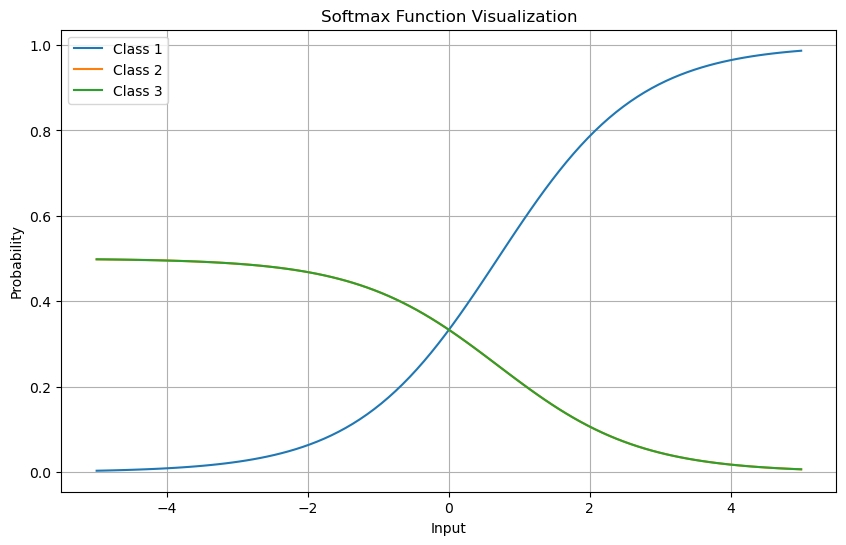

In [20]:
def plot_softmax():
    x = np.linspace(-5, 5, 100)
    x1 = np.zeros((100, 3))
    x1[:, 0] = x
    x1[:, 1] = 0
    x1[:, 2] = 0
    
    y = np.array([softmax(x1[i]) for i in range(100)])
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y[:, 0], label='Class 1')
    plt.plot(x, y[:, 1], label='Class 2')
    plt.plot(x, y[:, 2], label='Class 3')
    plt.title('Softmax Function Visualization')
    plt.xlabel('Input')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_softmax()

## Gradient Computation

The derivative of softmax is unique as it produces a Jacobian matrix:

$$ \frac{\partial softmax(x)_i}{\partial x_j} = softmax(x)_i(\delta_{ij} - softmax(x)_j) $$

where $\delta_{ij}$ is the Kronecker delta.

In [21]:
def softmax_gradient(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

# Example gradient computation
x = np.array([1.0, 2.0, 0.0])
grad = softmax_gradient(x)
print("Softmax gradient (Jacobian):")
print(grad)

Softmax gradient (Jacobian):
[[ 0.18483645 -0.1628034  -0.02203304]
 [-0.1628034   0.22269543 -0.05989202]
 [-0.02203304 -0.05989202  0.08192507]]


In [22]:
def softmax_gradient(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

# Example gradient computation
x = np.array([1.0, 2.0, 0.0])
grad = softmax_gradient(x)
print("Softmax gradient (Jacobian):")
print(grad)

Softmax gradient (Jacobian):
[[ 0.18483645 -0.1628034  -0.02203304]
 [-0.1628034   0.22269543 -0.05989202]
 [-0.02203304 -0.05989202  0.08192507]]
